In [1]:
import pandas as pd

sensor_data = "../all respondents data/002_a2da21a1-4fbb-43db-a269-709b7b376275.csv"
cognitive_phase_data = "002-cognitive task.csv"

df_sensor = pd.read_csv(sensor_data, low_memory=False)
df_phases = pd.read_csv(cognitive_phase_data)

df_sensor.head()
df_phases.head()

# print(df_sensor['Timestamp'].dtype)
# print(df_phases['Time Started'].dtype)



,Time Started,Cognitive Task,Screens
0,0:00:22,Task Understanding,Supporting Material
1,0:02:15,Focus,Map
2,0:02:37,Generate Hypothesis,Map
3,0:03:01,Task Understanding,Supporting Material
4,0:03:12,Set Goal,Map


In [2]:
import datetime

# Define a function to convert a time string to milliseconds
def time_to_ms(time_str):
    time_obj = datetime.datetime.strptime(time_str, '%H:%M:%S').time()  # Parse time string to time object
    delta_obj = datetime.timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second)  # Create timedelta object
    ms = delta_obj.total_seconds() * 1000  # Convert to milliseconds
    return ms

# Convert the 'Time Started' column to milliseconds
df_phases['Time Started'] = df_phases['Time Started'].apply(time_to_ms)

# Print the resulting DataFrame
print(df_phases)
print(df_phases['Time Started'].dtype)


    Time Started       Cognitive Task              Screens
0        22000.0   Task Understanding  Supporting Material
1       135000.0                Focus                  Map
2       157000.0  Generate Hypothesis                  Map
3       181000.0   Task Understanding  Supporting Material
4       192000.0             Set Goal                  Map
5       194000.0      Test Hypothesis               Filter
6       290000.0      Create Artifact          Save Filter
7       299000.0        Asses Results         Filtered Map
8       346000.0   Task Understanding  Supporting Material
9       365000.0          Refine Goal                  Map
10      378000.0      Test Hypothesis               Filter
11      421000.0              Explore  Supporting Material
12      430000.0      Test Hypothesis               Filter
13      444000.0        Asses Results         Filtered Map
14      470000.0        Asses Results           Statistics
15      515000.0             Conclude                  N

In [3]:
merged_df = pd.merge_asof(df_sensor, df_phases, left_on='Timestamp', right_on='Time Started')
final_df = merged_df[['Timestamp', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion','Cognitive Task', 'Screens']]
final_df.head()


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
0,36248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task Understanding,Supporting Material
1,36255.0,0.127283,0.192411,0.024108,0.127569,0.024123,0.127153,0.055509,0.328766,0.0,0.005133,0.005133,Task Understanding,Supporting Material
2,36255.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task Understanding,Supporting Material
3,36287.0,0.127359,0.192525,0.024114,0.127561,0.024122,0.127136,0.055505,0.328766,0.0,0.006309,0.008013,Task Understanding,Supporting Material
4,36319.0,0.127303,0.192574,0.024092,0.127527,0.024119,0.127136,0.055496,0.328766,0.0,0.007676,0.010048,Task Understanding,Supporting Material


In [4]:
#Remove rows with empty emotions data
final_df = final_df.dropna(subset=['Contempt'])

# Check if a categorical value exists in the DataFrame
if final_df['Cognitive Task'].isin(['Explore']).any():
    print('The categorical value exists in the DataFrame')
else:
    print('The categorical value does not exist in the DataFrame')

final_df.to_csv('003-91dc3428_emotions_with_cognitive_task_and_screen_new.csv', index=False)
final_df.tail()

The categorical value exists in the DataFrame


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
36071,644878.0,0.667496,0.185221,0.265321,0.572471,0.024084,0.124680,0.067664,17.164705,0.0,0.001010,0.139380,NaN,NaN
36073,644910.0,0.663681,0.185508,0.262483,0.567846,0.024085,0.124724,0.067345,16.731131,0.0,0.001013,0.128289,NaN,NaN
36075,644941.0,0.653778,0.186073,0.256115,0.557025,0.024087,0.124877,0.066875,15.779153,0.0,0.000974,0.117354,NaN,NaN
36077,644974.0,0.653938,0.185693,0.256493,0.559245,0.024093,0.124670,0.067311,15.879745,0.0,0.000949,0.115118,NaN,NaN
36079,645006.0,0.658947,0.185255,0.260046,0.565238,0.024090,0.124447,0.067447,16.416035,0.0,0.000945,0.114937,NaN,NaN


In [5]:
display(final_df.sample(15))

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
36011,643869.0,0.924726,0.193486,0.396612,0.689586,0.024106,0.128820,0.064522,32.836811,0.000000,0.000729,0.320347,NaN,NaN
12893,254013.0,0.115105,37.038864,0.076152,0.240217,0.307879,0.173239,0.171868,66.042915,5.020270,22.374130,0.019678,Test Hypothesis,Filter
31383,566206.0,0.757590,2.161943,0.217097,0.196612,0.026967,0.433819,0.057908,66.092392,-18.245163,1.681939,0.173406,Asses Results,Statistics
12279,243742.0,1.091078,0.119957,0.680726,1.748285,0.024189,0.093148,2.047263,88.724808,0.000000,0.011876,0.161992,Test Hypothesis,Filter
30271,547581.0,0.863068,0.114548,0.605477,1.797573,0.024194,0.091916,0.397831,87.888176,0.000000,0.008386,0.019032,Asses Results,Statistics
4243,108397.0,0.128592,0.193458,0.024093,0.128543,0.024048,0.128452,0.055662,0.328766,0.000000,0.000835,0.070431,Task Understanding,Supporting Material
25759,471822.0,1.234317,0.209193,0.646337,0.967082,0.026554,0.125685,0.157355,63.765209,0.000000,0.019924,0.149729,Asses Results,Statistics
7207,158208.0,0.127655,0.192908,0.024090,0.127571,0.024064,0.127520,0.055502,0.328766,0.000000,0.018224,0.035525,Generate Hypothesis,Map
28463,517324.0,1.014773,0.171659,0.502144,0.947552,0.024158,0.117950,0.177366,55.144127,0.000000,0.004000,0.019917,Conclude,NaN
34303,615120.0,2.951215,0.591251,0.023952,2.247567,0.027970,0.121545,0.994663,4.843243,0.000000,0.904898,0.003397,NaN,NaN


In [6]:
display(final_df.describe())

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion
count,18043.000000,18043.000000,18043.000000,18043.000000,18043.000000,18043.000000,18043.000000,18043.000000,18043.000000,18043.000000,18043.000000,18043.000000
mean,341175.656432,1.492387,2.293202,0.511250,1.472134,0.583034,0.419978,1.585358,39.120314,-1.164663,0.663638,1.131632
std,175767.091064,6.952301,12.729154,2.711954,6.514981,6.857133,2.808750,8.695107,33.653031,9.399388,5.254392,7.047000
min,36255.000000,0.019254,0.000010,0.008601,0.029399,0.024038,0.006538,0.055311,0.328766,-84.526886,0.000205,0.000285
25%,188789.000000,0.142149,0.187635,0.026342,0.142406,0.024072,0.125672,0.057859,0.328766,0.000000,0.002059,0.030920
50%,341965.000000,0.828894,0.191973,0.457252,0.699934,0.024114,0.127305,0.085616,51.386131,0.000000,0.006134,0.076768
75%,493596.500000,1.278405,0.193728,0.665125,0.961478,0.024248,0.128886,0.439833,64.569603,0.000000,0.026990,0.255665
max,645006.000000,95.615936,99.885056,88.027222,98.174744,99.958595,56.862343,99.973244,99.981064,98.415382,81.888107,94.985863


In [7]:
# Create medians df
medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].groupby(final_df['Cognitive Task']).median()
# Reset index and add 'Cognitive Task' as a column
medians = medians.reset_index()
medians['Cognitive Task'] = medians['Cognitive Task']

# Print the medians dataframe
print(medians)
medians.head()

        Cognitive Task     Anger  Contempt   Disgust      Fear       Joy  \
0        Asses Results  0.908940  0.192794  0.549257  0.850341  0.024137   
1             Conclude  1.223406  0.179269  0.640244  1.005446  0.024127   
2      Create Artifact  1.279110  0.190099  0.668244  0.988952  0.024310   
3              Explore  1.299997  0.191150  0.668666  0.958522  0.024139   
4                Focus  0.302032  0.192961  0.082935  0.271439  0.024082   
5  Generate Hypothesis  0.722544  0.192079  0.327433  0.492178  0.024145   
6          Refine Goal  1.258338  0.191504  0.651123  0.926014  0.024092   
7             Set Goal  0.916751  0.191535  0.404255  0.698101  0.024087   
8   Task Understanding  0.140280  0.192146  0.025372  0.140770  0.024078   
9      Test Hypothesis  1.100544  0.190409  0.638398  0.930782  0.024153   

    Sadness  Surprise  Engagement  Sentimentality  Confusion  
0  0.128112  0.092904   60.760586        0.007295   0.187685  
1  0.121500  0.883110   65.072559    

,Cognitive Task,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Sentimentality,Confusion
0,Asses Results,0.908940,0.192794,0.549257,0.850341,0.024137,0.128112,0.092904,60.760586,0.007295,0.187685
1,Conclude,1.223406,0.179269,0.640244,1.005446,0.024127,0.121500,0.883110,65.072559,0.008882,0.023058
2,Create Artifact,1.279110,0.190099,0.668244,0.988952,0.024310,0.126683,0.154757,66.473640,0.054105,0.192531
3,Explore,1.299997,0.191150,0.668666,0.958522,0.024139,0.127327,0.348001,63.742088,0.002924,0.302481
4,Focus,0.302032,0.192961,0.082935,0.271439,0.024082,0.128312,0.062937,1.138241,0.003118,0.113828


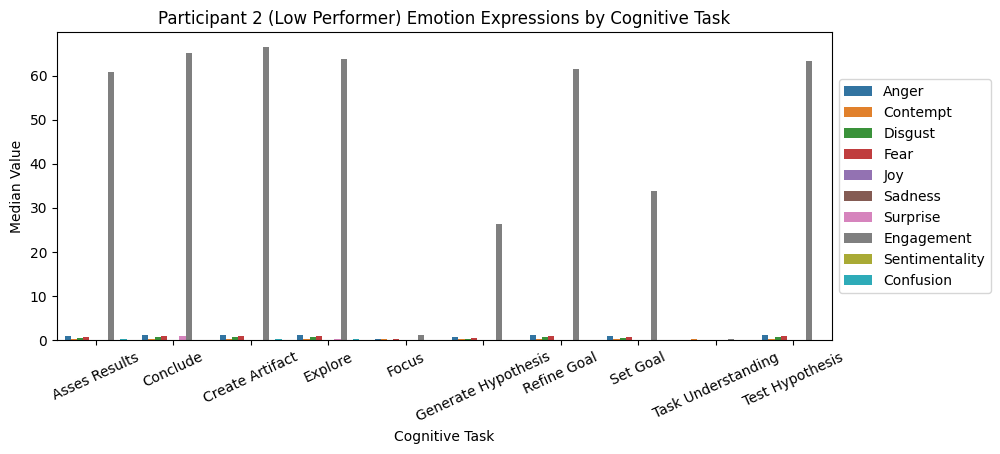

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# medians_to_plot = medians.drop(['Engagement', 'Cognitive Task Encoded'], axis=1)

# Melt the dataframe to convert emotions into a column
melted_df = medians.melt(id_vars='Cognitive Task', var_name='Emotion', value_name='Median Value')

# Create the bar plot using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='Cognitive Task', y='Median Value', hue='Emotion', data=melted_df)

# Set the title and axes labels
plt.title('Participant 2 (Low Performer) Emotion Expressions by Cognitive Task')
plt.xlabel('Cognitive Task')
plt.ylabel('Median Value')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=25)

# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()


<h3>Mean</h3>

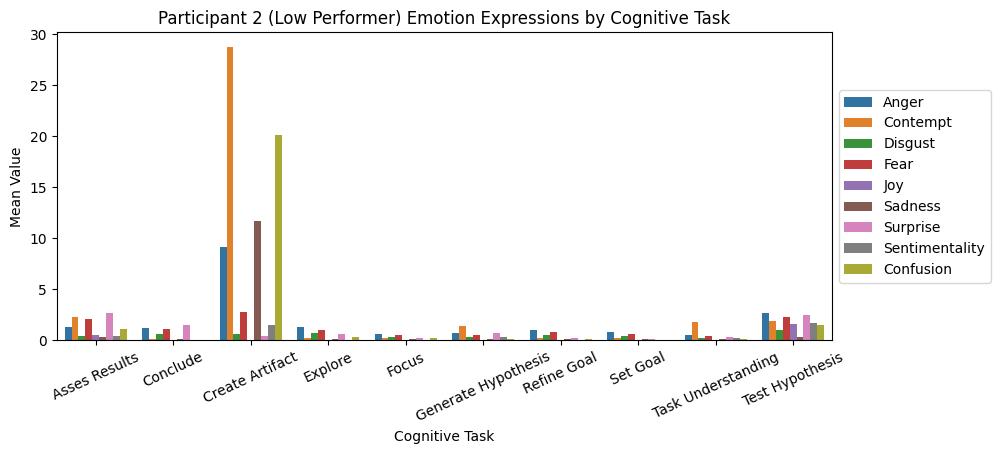

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create means df
means = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Sentimentality', 'Confusion']].groupby(final_df['Cognitive Task']).mean()
# Reset index and add 'Cognitive Task' as a column
means = means.reset_index()
means['Cognitive Task'] = means['Cognitive Task']

# Melt the dataframe to convert emotions into a column
melted_df = means.melt(id_vars='Cognitive Task', var_name='Emotion', value_name='Mean Value')

# Create the bar plot using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='Cognitive Task', y='Mean Value', hue='Emotion', data=melted_df)

# Set the title and axes labels
plt.title('Participant 2 (Low Performer) Emotion Expressions by Cognitive Task')
plt.xlabel('Cognitive Task')
plt.ylabel('Mean Value')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=25)

# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

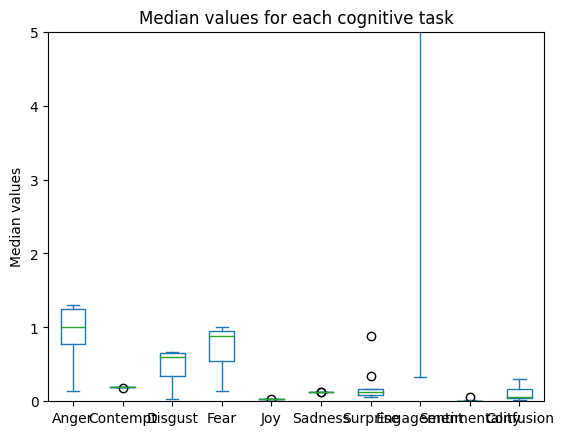

In [11]:
import matplotlib.pyplot as plt


# create a box plot of the medians
medians.plot(kind='box')

plt.ylim(0, 5)

# set the plot title and axis labels
plt.title('Median values for each cognitive task')
plt.ylabel('Median values')

# display the plot
plt.show()

In [12]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Print the column names in the dataframe
print(medians.columns)

# Encode 'Cognitive Task' column into numerical values
le = LabelEncoder()
medians['Cognitive Task Encoded'] = le.fit_transform(medians['Cognitive Task'])



Index(['Cognitive Task', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy',
       'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion'],
      dtype='object')


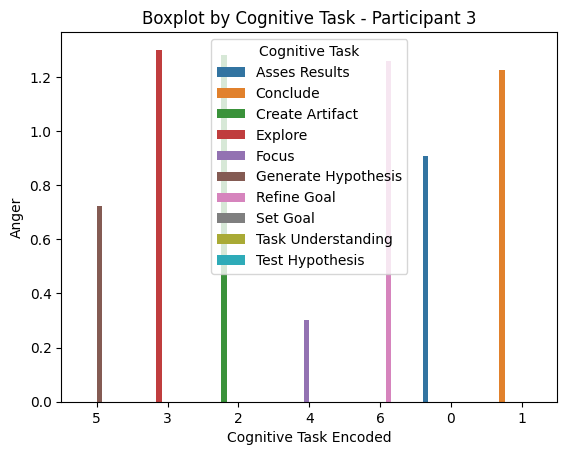

In [13]:
import matplotlib.pyplot as plt

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Participant 3")

# Display the plot
plt.show()


In [14]:
# Create medians df
general_medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].median()
general_medians.head(20)


Anger              0.828894
Contempt           0.191973
Disgust            0.457252
Fear               0.699934
Joy                0.024114
Sadness            0.127305
Surprise           0.085616
Engagement        51.386131
Sentimentality     0.006134
Confusion          0.076768
dtype: float64

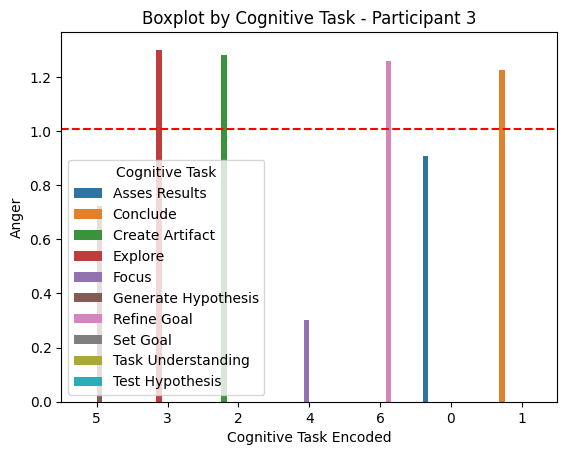

In [15]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Anger'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Participant 3")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Get the original string labels from the LabelEncoder
le = LabelEncoder()
le.fit(medians['Cognitive Task'])
labels = le.inverse_transform([5,3,2,4,6,0,1])  


# Display the plot
plt.show()


Wrong Lables below!!!

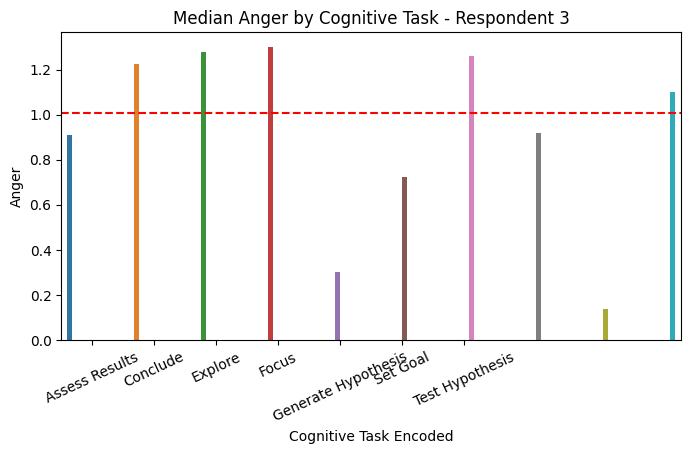

In [16]:
import matplotlib.pyplot as plt

# Define a dictionary to map encoded labels to their corresponding original labels
label_map = {0: 'Assess Results', 1: 'Conclude', 2: 'Explore', 3: 'Focus', 4: 'Generate Hypothesis', 5: 'Set Goal', 6: 'Test Hypothesis'}

# Calculate the general median values
general_median = medians['Anger'].median()

# Create the plot with a wider figure size
fig, ax = plt.subplots(figsize=(8,4))

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task')

# Add the title
plt.title("Median Anger by Cognitive Task - Respondent 3")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Define the desired order of the labels as a list
ordered_labels = [label_map[i] for i in [0,1,2,3,4,5,6]] # [5,3,2,4,6,0,1]]

# Set the x-axis tick labels using the ordered_labels list
plt.xticks(range(len(label_map)), ordered_labels, rotation=25, fontsize=10)

plt.legend().remove()
# Display the plot
plt.show()


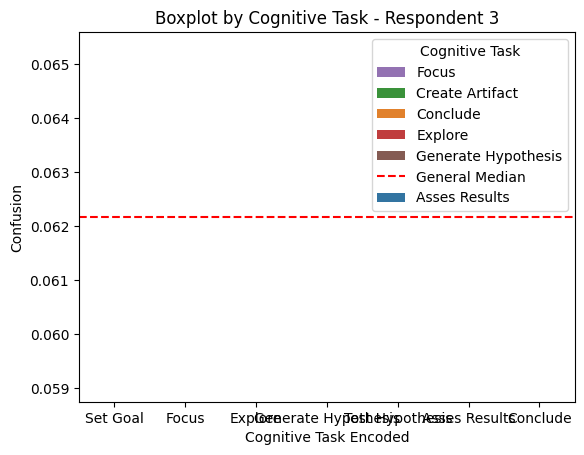

In [17]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Confusion'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Confusion', data=medians, hue='Cognitive Task', order=['Set Goal','Focus', 'Explore', 'Generate Hypothesis', 'Test Hypothesis', 'Asses Results', 'Conclude'])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 3")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Reorder the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [5,3,2,4,6,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Cognitive Task')

# Display the plot
plt.show()


In [18]:
cognitive_df = final_df['Cognitive Task']
cognitive_df.replace('nan', pd.NA, inplace=True)

cognitive_df.dropna
cognitive_df.head

<bound method NDFrame.head of 1        Task Understanding
3        Task Understanding
4        Task Understanding
5        Task Understanding
6        Task Understanding
                ...        
36071                   NaN
36073                   NaN
36075                   NaN
36077                   NaN
36079                   NaN
Name: Cognitive Task, Length: 18043, dtype: object>

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# df_phases = pd.read_csv(cognitive_phase_data)
df_phases = pd.DataFrame(final_df['Cognitive Task'], columns=['Cognitive Task'])

# Convert the Cognitive Task column to a string type
df_phases['Cognitive Task'] = df_phases['Cognitive Task'].astype(str)

df_phases.replace('nan', pd.NA, inplace=True)
# df_phases['Cognitive Task'] = df_phases['Cognitive Task'].replace("<NA>", float('nan'))


# df_cleaned = df_phases.dropna()

df_cleaned = df_phases.dropna(subset=['Cognitive Task'], how='any').copy()



df_cleaned.head()




,Cognitive Task
1,Task Understanding
3,Task Understanding
4,Task Understanding
5,Task Understanding
6,Task Understanding


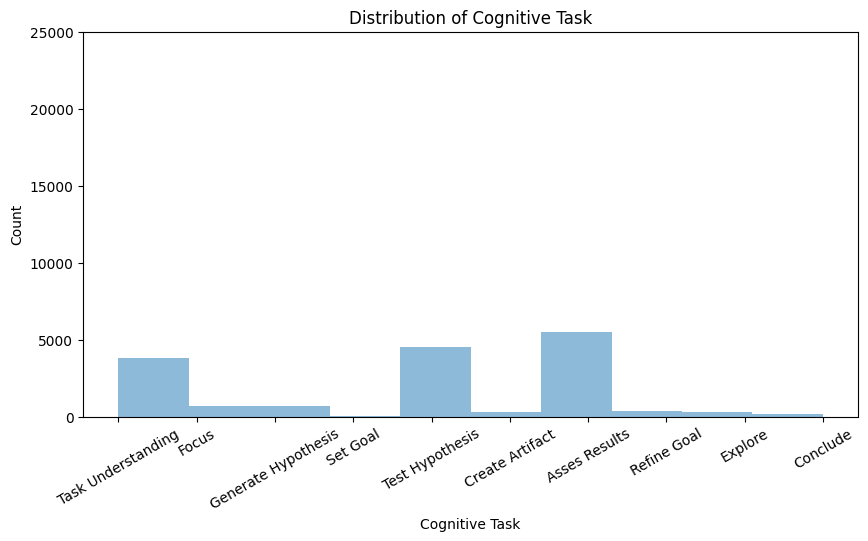

In [21]:
# Create a wider figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create a histogram of the Cognitive Task column
plt.hist(df_cleaned['Cognitive Task'], alpha=0.5)
plt.ylim(0, 25000) 

# Add labels and title
plt.xlabel('Cognitive Task')
plt.ylabel('Count')
plt.title('Distribution of Cognitive Task')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=30)
# Show the plot
plt.show()